#**DATA MATH 361 Lab Assignment 8** by John Dominguez-Trujillo

*ALL CODE WAS DEVELOPED IN VISUAL STUDIO CODE AND PASTED INTO GOOGLE COLAB*

###**Activity 1:** Find a data set with two quantitative variables and at least 50 observations. Write Python code to make a scatter plot and fit a least squares line (OLS Line) and show its equation and the value of $R^2$. In words, interpret the slope and vertical intercept of your least squares line in terms of the context of your data. Be specific.

        Entity Code  Year  Annual CO₂ emissions (per capita)  GDP per capita  \
0  Afghanistan  AFG  1949                           0.001992             NaN   
1  Afghanistan  AFG  1950                           0.010837          1156.0   
2  Afghanistan  AFG  1951                           0.011625          1170.0   
3  Afghanistan  AFG  1952                           0.011468          1189.0   
4  Afghanistan  AFG  1953                           0.013123          1240.0   

  900793-annotations  Population (historical) World regions according to OWID  
0                NaN                7356890.0                             NaN  
1                NaN                7776182.0                             NaN  
2                NaN                7879343.0                             NaN  
3                NaN                7987783.0                             NaN  
4                NaN                8096703.0                             NaN  


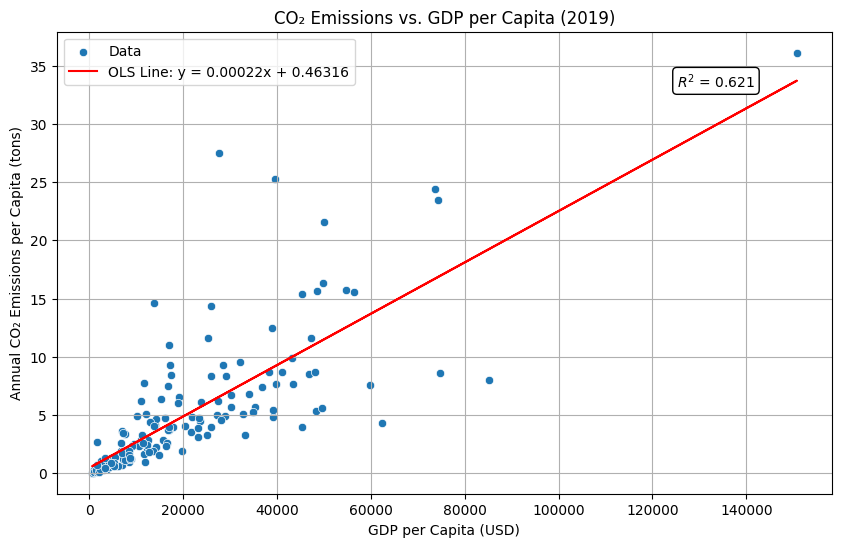

Equation of the Best Fit Line: y = 0.00022x + 0.46316
R² Value: 0.621


In [1]:
### Activity 1

## IMPORTS ESSENTIAL LIBRARIES
## PANDAS IS A LIBRARY USED FOR DATA MANIPULATION, ANALYSIS, AND DATA STRUCTURES
## MATPLOTLIB IS A PLOTTING LIBRARY THAT PROVIDES AN OBJECT-OREINTED API FOR DISPLAYING PLOTS
## SEABORN IS A DATA VISUALIZATION LIBRARY BUILT ON TOP OF MATPLOTLIB THAT MAKES ATTRACTIVE AND INFORMATIVE STATISTICAL GRAPHICS
## LINEARREGRESSION FROM SKLEARN BUILDS A LINE OF BEST FIT BY MINIMIZING THE SQUARED DIFFERENCES BETWEEN ACTUAL AND PREDICTED VALUES
## R2_SCORE FROM SKLEARN CALCULATES HOW WELL THE LINE OF BEST FIT EXPLAINS THE VARIATION IN THE DATA (R² VALUE)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## LOADS DATA FROM CSV INTO A VARIABLE
## USING A URL THAT LINKS DIRECTLY TO THE CSV FILE IN MY GITHUB SO ANYONE CAN ACCESS IT
url = 'https://raw.githubusercontent.com/JohnDT-MechE/DATA-MATH-361-Lab-Assignments/main/Lab_Assignment_8/co2-emissions-vs-gdp.csv'  # Update this path to where your CSV is located
data = pd.read_csv(url)

## DISPLAYS THE FIRST COUPLE ROWS OF DATA TO UNDERSTAND THE DATA STRUCTURE
print(data.head())

## FILTERS THE DATA FOR THE YEAR 2019
data_2019 = data[data['Year'] == 2019]

## DROPS ROWS WITH MISSING VALUES IN 'ANNUAL CO₂ EMISSIONS (PER CAPITA)' AND 'GDP PER CAPITA' COLUMNS
data_2019 = data_2019.dropna(subset=['Annual CO₂ emissions (per capita)', 'GDP per capita'])

## EXTRACTS THE INDEPENDENT VARIABLE (GDP PER CAPITA) INTO X
## EXTRACTS THE DEPENDENT VARIABLE (ANNUAL CO₂ EMISSIONS (PER CAPITA)) INTO Y
X = data_2019[['GDP per capita']]
y = data_2019['Annual CO₂ emissions (per capita)']

## INITIALIZES AND FITS THE LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X, y)

## CALCULATES PREDICTED Y-VALUES BASED ON THE LINEAR REGRESSION MODEL CALCULATED ABOVE
y_pred = model.predict(X)

## CALCULATES THE SLOPE, Y-AXIS INTERCEPT, AND R-SQUARED VALUED BASED ON THE LINEAR REGRESSION MODEL CALCULATED EARLIER
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)


## CREATES A FIGURE AND DEFINES SIZE
plt.figure(figsize=(10, 6))

## CREATES A SCATTER PLOT THAT SHOWS THE RELATIONSHIP BETWEEN GDP PER CAPITA AND ANNUAL CO₂ EMISSIONS PER CAPITA FOR 2019
sns.scatterplot(x='GDP per capita', y='Annual CO₂ emissions (per capita)', data=data_2019, label='Data')

## PLOTS X AND Y_PRED (THE LINE OF BEST FIT) VALUES ON FIGURE, LABELS THE PLOTTED DATA, AND SETS THE COLOR TO RED
plt.plot(X, y_pred, color='red', label=f'OLS Line: y = {slope:.5f}x + {intercept:.5f}')

## ADDS TITLE TO PLOT AND LABELS THE X AND Y AXIS OF THE PLOT
plt.title('CO₂ Emissions vs. GDP per Capita (2019)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Annual CO₂ Emissions per Capita (tons)')

## ADDS A LEGEND TO THE FIGURE
plt.legend()

## ADDS A GRID TO THE FIGURE
plt.grid(True)

## ADDS CUSTOM TEXT TO THE PLOT AND DISPLAYS THE R² VALUE IN THE TOP RIGHT CORNER WITH A WHITE BACKGROUND FOR BETTER READABILITY
plt.text(0.80, 0.88, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

## SHOWS THE PLOT IN THE FIGURE
plt.show()

## PRINTS THE EQUATION OF THE BEST FIT LINE TO THE OUTPUT TERMINAL AND LIMITS THE SLOPE AND INTERCEPT VALUES TO HAVE ONLY 5 DECIMAL DIGITS
print(f"Equation of the Best Fit Line: y = {slope:.5f}x + {intercept:.5f}")

## PRINTS THE CALCULATED R² VALUE TO THE OUTPUT TERMINAL AND LIMITS THE R² VALUE TO HAVE ONLY 3 DECIMAL DIGITS
print(f"R² Value: {r_squared:.3f}")

The slope of the line of best fit is 0.00022. This means that for every additional \$1 increase in the annual GDP per capita, a country's $CO_2$ emissions per capita increases by about 0.00022 metric tons. This indicates a positive relationship because as countries become wealthier, their $CO_2$ emissions per person rise.

The y-intercept is 0.46316. This represents the predicted $CO_2$ emissions per capita for a country with a \$0 GDP per capita. This is not a realistic scenario, however, it does suggest that even countries with very low GDPs may still produce a base level of $CO_2$ emissions. This coule possible be due to basic industrial or subsistence activities.

Finally, the $R^2$ value is 0.621. This means that about 62.1% of the variation in $CO_2$ emissions per capita can be explained by the GDP per capita. At 62.1%, this shows a moderate to strong linear relationship between the two variables, however, there is reason to believe that other factors may also play a role.